In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
from scipy.optimize import curve_fit

In [2]:
def event_model(year: float = 2022) -> float:
    """
    Return the estimated number of bytes produced by a detector for a given year past 2022.
    Combines projected pile-up and resolution increases.
    """
    
    #based on CMS TDR 21 data & FCC projections
    start_year = 2022
    year = year - start_year
    
    exp_fit = np.array([8.05359635e+05, 2.63780088e-01])
    exp_fn = lambda x, k, a: k * np.exp(a*x)
    event_size = exp_fn(year, *exp_fit)
    
    return event_size

In [3]:
future_years = np.linspace(2022, 2022 + 30, 101)

In [4]:
data_path = "microprocessor-trend-data/50yrs/"

In [5]:
watts = pd.DataFrame(np.genfromtxt(open(data_path + "watts.dat", "rb")), columns=["Year", "Power (W)"])

In [6]:
freq = pd.DataFrame(np.genfromtxt(open(data_path + "frequency.dat", "rb")), columns=["Year", "Frequency (kHz)"])

In [7]:
watts

,Year,Power (W)
0,1971.875000,0.445079
1,1972.307692,0.421697
2,1974.326923,0.922240
3,1979.567308,1.715438
4,1982.307692,3.023213
...,...,...
96,2020.900000,28.000000
97,2021.300000,290.000000
98,2021.800000,30.000000
99,2021.900000,500.000000


In [8]:
freq

,Year,Frequency (kHz)
0,1971.875000,0.704136
1,1972.259615,0.509368
2,1974.326923,2.016915
3,1979.567308,5.048066
4,1982.307692,6.097562
...,...,...
96,2020.900000,3200.000000
97,2021.300000,2300.000000
98,2021.800000,3200.000000
99,2021.900000,1000.000000


In [9]:
px.scatter(watts, x="Year", y="Power (W)", log_y = True)

In [10]:
fig = px.scatter(freq, x="Year", y="Frequency (kHz)", log_y = True)

In [11]:
fig.update_layout(width = 800, height = 600,
                xaxis_title=dict(text="Year", font=dict(size=24)),  
                yaxis_title=dict(text="Processor Frequency (kHz)", font=dict(size=24)),
                xaxis=dict(tickfont=dict(size=18)), 
                yaxis=dict(tickfont=dict(size=18)), )

In [12]:
transistors = pd.DataFrame(np.genfromtxt(open(data_path + "transistors.dat", "rb")), columns=["Year", "Transistors"])

In [13]:
transistors

,Year,Transistors
0,1971.875000,2.308242e+00
1,1972.307692,3.554522e+00
2,1974.326923,6.097562e+00
3,1979.567308,2.916378e+01
4,1982.307692,1.357727e+02
...,...,...
94,2020.100000,3.040000e+07
95,2020.900000,1.600000e+07
96,2021.800000,5.700000e+07
97,2021.900000,5.820000e+07


In [14]:
transistors.iloc[-1]["Transistors"] * 1e3 / 1e6

np.float64(55000.0)

In [15]:
lin_fn = lambda x, k, a: a * x + k

In [16]:
exp_fn = lambda x, k, a: k * np.exp(a*x)

In [17]:
start_year = 2022

In [18]:
reticle_limit = 850

In [19]:
np.sqrt(reticle_limit)

np.float64(29.154759474226502)

In [20]:
transistor_fit = curve_fit(lin_fn, transistors["Year"] - start_year, np.log(transistors["Transistors"]))

In [21]:
transistor_fit

(array([17.72539602,  0.34744438]),
 array([[1.16065888e-02, 4.71668217e-04],
        [4.71668217e-04, 2.57654020e-05]]))

In [22]:
watts_fit = curve_fit(lin_fn, transistors["Year"] - start_year, np.log(transistors["Transistors"]))

In [23]:
def transistor_model_hist(year: float):
    year = year - start_year
    data_fit_50yrs = np.array([17.72539602,  0.34744438])
    #exponential fit to thousands of transistors
    fit = np.exp(lin_fn(year, *data_fit_50yrs)) * 1e3
    return fit

In [24]:
transistors_2022 = transistor_model_hist(start_year)

In [25]:
transistors_2022

np.float64(49893236976.327805)

Text(0, 0.5, 'Integrated Transistors')

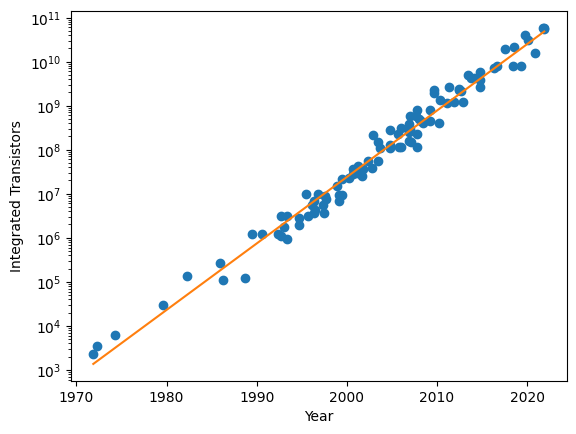

In [26]:
plt.semilogy(transistors["Year"], transistors["Transistors"]*1e3, 'o')
plt.semilogy(transistors["Year"], np.exp(lin_fn(transistors["Year"] - start_year, *transistor_fit[0]))*1e3)
plt.xlabel("Year")
plt.ylabel("Integrated Transistors")

In [27]:
fit_2022 = np.exp(lin_fn(0, *transistor_fit[0]))*1e3

In [28]:
density = transistors_2022 / reticle_limit

In [29]:
density

np.float64(58697925.8545033)

In [30]:
start_year

2022

In [31]:
fit_2022

np.float64(49893236736.914345)

In [32]:
fit_2022 / 1e6

np.float64(49893.23673691435)

Text(0, 0.5, 'Maximum Density (1/mm^2)')

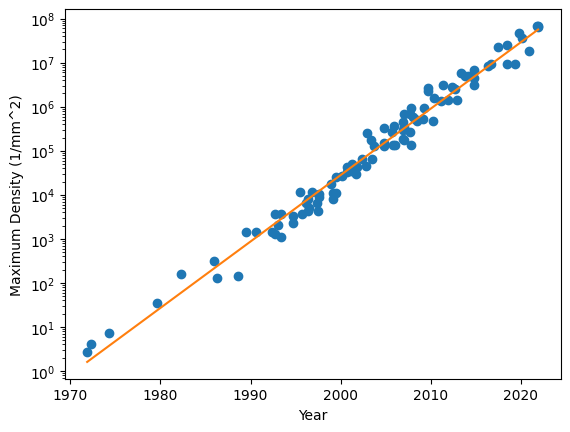

In [33]:
plt.semilogy(transistors["Year"], transistors["Transistors"]*1e3 / reticle_limit, 'o')
plt.semilogy(transistors["Year"], transistor_model_hist(transistors["Year"]) / reticle_limit)
plt.xlabel("Year")
plt.ylabel("Maximum Density (1/mm^2)")

In [34]:
irds_proj = pd.read_excel("scaling projection.xlsx")

In [35]:
irds_proj

,Year,TOPS / mm2,Tops/W
0,2022,1.00,1.00
1,2025,1.39,1.23
2,2028,1.93,1.39
3,2031,4.07,1.79
4,2034,8.68,1.99
5,2037,14.62,2.03


In [36]:
density_fit = curve_fit(lin_fn, irds_proj["Year"] - start_year, np.log(irds_proj["TOPS / mm2"]))

In [37]:
density_fit

(array([-0.19815559,  0.18717361]),
 array([[ 0.01792359, -0.00162942],
        [-0.00162942,  0.00021726]]))

In [38]:
def density_scale_model(year: float):
    year = year - start_year
    fit = np.array([-0.19815559,  0.18717361])
    scale = np.exp(lin_fn(year, *fit))
    return scale

In [39]:
density_scale_model(irds_proj["Year"])

0     0.820242
1     1.438161
2     2.521581
3     4.421181
4     7.751821
5    13.591554
Name: Year, dtype: float64

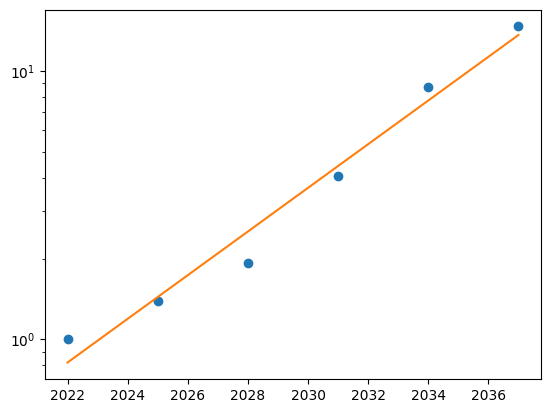

In [40]:
plt.semilogy(irds_proj["Year"], irds_proj["TOPS / mm2"], 'o')
plt.semilogy(irds_proj["Year"], density_scale_model(irds_proj["Year"]))

In [41]:
future_years = irds_proj["Year"]

In [42]:
future_density = density * irds_proj["TOPS / mm2"]

In [43]:
proj_years = np.linspace(np.min(transistors["Year"]), np.max(future_years), 101)

In [44]:
future_fit = curve_fit(lin_fn, future_years - start_year, np.log(future_density * reticle_limit))

In [45]:
future_fit

(array([24.43499571,  0.18717361]),
 array([[ 0.01792359, -0.00162942],
        [-0.00162942,  0.00021726]]))

Text(0, 0.5, 'Maximum Density (1/mm^2)')

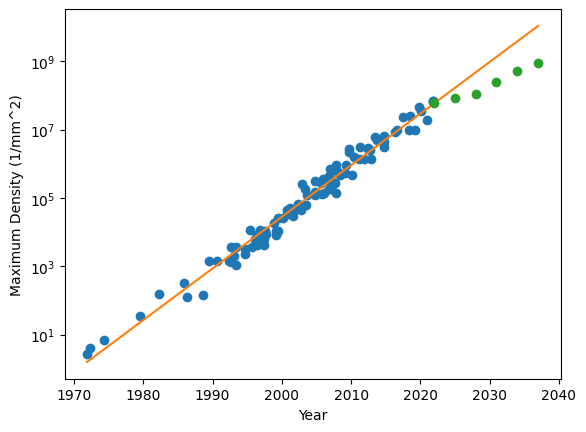

In [46]:
plt.semilogy(transistors["Year"], transistors["Transistors"]*1e3 / reticle_limit, 'o')
plt.semilogy(proj_years, transistor_model_hist(proj_years) / reticle_limit)
plt.semilogy(future_years, future_density, 'o')

plt.xlabel("Year")
plt.ylabel("Maximum Density (1/mm^2)")

In [47]:
def transistor_model_future(year: float):
    year = year - start_year
    data_fit_irds = np.array([24.43499571,  0.18717361])
    #exponential fit to thousands of transistors
    fit = np.exp(lin_fn(year, *data_fit_irds)) 
    return fit

In [48]:
transistor_model_hist(2022)

np.float64(49893236976.327805)

In [49]:
transistor_model_future(2022)

np.float64(40924539588.0071)

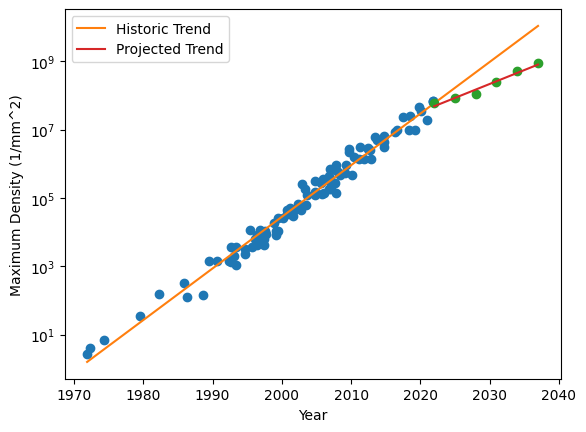

In [50]:
plt.figure(dpi=100)
plt.semilogy(transistors["Year"], transistors["Transistors"]*1e3 / reticle_limit, 'o')
plt.semilogy(proj_years, transistor_model_hist(proj_years) / reticle_limit, label="Historic Trend")
plt.semilogy(future_years, future_density, 'o')
plt.semilogy(future_years, transistor_model_future(future_years) / reticle_limit, label="Projected Trend")
plt.xlabel("Year")
plt.ylabel("Maximum Density (1/mm^2)")
plt.legend()

In [51]:
import plotly.express as px
import plotly.graph_objects as go

In [52]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = transistors["Year"], 
                         y = transistors["Transistors"]*1e3 / reticle_limit, 
                         name = "Historic",
                        mode = "markers",
                        marker=dict(size=6, color="blue", symbol="circle"),))

cutoff = 2023
mask = proj_years < 2023
fig.add_trace(go.Scatter(x = proj_years[mask], 
                         y = transistor_model_hist(proj_years)[mask] / reticle_limit, 
                         name = "Historic Trend",
                        mode = "lines",
                        line=dict(color="blue")))

fig.add_trace(go.Scatter(x = future_years, 
                         y = future_density, 
                         name = "Future",
                        mode = "markers",
                        marker=dict(size=6, color="red", symbol="circle")))

fig.add_trace(go.Scatter(x = future_years, 
                         y = transistor_model_future(future_years) / reticle_limit, 
                         name = "Future Trend",
                        mode = "lines",
                        line=dict(color="red")))

fig.update_layout(yaxis_type = "log",
                  yaxis_title = "Transistor Density (1/mm<sup>2</sup>)",
                  xaxis_title="Year",
                 title="Transistor Density by Year",
                 font=dict(
                    size=16,  # Set the font size here
                    color="Black"
                  ),
                 width = 800,
                 height = 600)

In [53]:
fig

In [56]:
fig.write_image(os.path.join("figures", "cpu_scaling.png"))